In [1]:
from mlwpy import *
%matplotlib inline

# Probability 

Using NumPy, we can generate evenly weighted random events with *np.random.randint*.<br>
randint is designed to mimic Python’s indexing semantics, which means that we include the starting point and we exclude
the ending point <br> `randint (start ,  end-1, size = None )` size is number of generated random numbers

In [2]:
np.random.randint(1, 7)

4

In [3]:
few_rolls = np.random.randint(1, 7, size=10)
many_rolls = np.random.randint(1, 7, size=1000)

We’ll count up how many times each event occurred with np.histogram. Note that
np.histogram is designed around plotting buckets of continuous values. Since we want to
capture discrete values, we have to create a bucket that surrounds our values of interest.
We capture the ones, I, by making a bucket between 0.5 and 1.5.

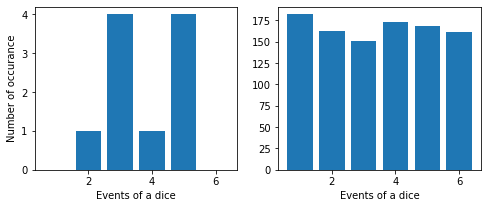

In [4]:
few_counts = np.histogram(few_rolls, bins=np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
x_axis = np.arange(1, 7)  # Return evenly spaced values within a given interval.
ax1.bar(x_axis, few_counts) 
ax1.set_xlabel("Events of a dice")
ax1.set_ylabel("Number of occurance")

ax2.bar(x_axis, many_counts);
ax2.set_xlabel("Events of a dice")
plt.show();

***When dealing with random events and overall
behavior, a small sample can be misleading. We may need to crank up the number of
examples—rolls, in this case—to get a better picture of the underlying behavior***

## Primitive Events
what is the probability of odd numbers --> P(odd) = P(1) + P(3) + P(5) = 1/6 + 1/6 + 1/6 = 1/2 <br>
compond probability is when working with more than one condition (what is the probability of getting an odd number or getting a number bigger than 3 or both) <br> ***P(odd) + P(big) - P(odd and big)*** = 1/2 + 1/2 - 1/6 = 5/6 <br>
we remove the intersection between events as it will be evaluted twice if not
<div>
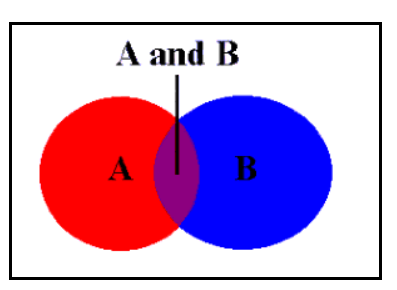
</div>

## Independence

if we are rolling two dices not the possible events goes from (2 - 12)<br>
what is the probability of getting the sum of 2, well we have 36 possibility --> P(2) = 1/36<br>
Since we have independant envents we can multiply the probabilities, ***P(3) = P(1,2) + P(2,1) = P(1)P(2) + P(2)P(1) = 1/18***

## Conditional Probability

Let's say we have two bags U1, U2 and each have a number of colored balls in them, we flip a coin to randomly select a bag and then randomly select a ball from the bag
<div>
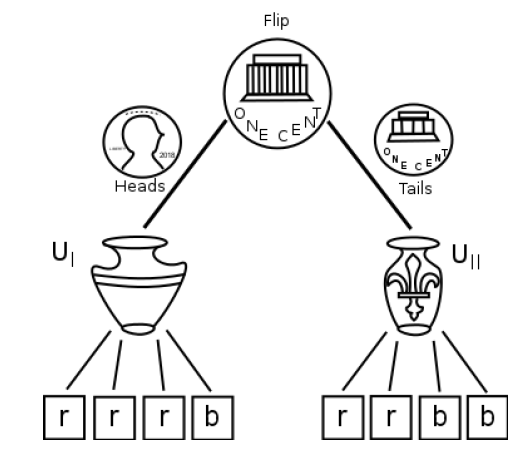
</div>
How often do we end up picking a red ball from Urn I? Well, to do that we have to (1) get to Urn I by flipping a head, and then (2) pick a red ball.<br>.
> P(red and U1) = P(red | U1).P(U1) = 3/4 * 1/2 = 3/8 <br>
>P(red) = P(red | U1) * P(U1) + P(red | U2) * P(U2) = 3/4 * 1/2 + 2/4 * 1/2  = 5/8

## Distributions

We call the mapping between events and probabilities a probability distribution. If you give me an event, then I can look it up in the probability distribution and tell you the probability that it occurred.

if I flip a coin many, many times and count the number of heads, here’s what happens as we
increase the number of flips:

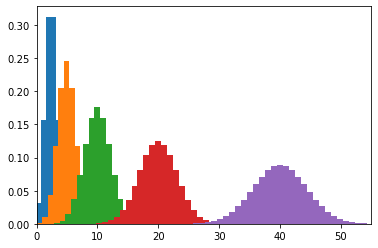

In [5]:
import scipy.stats as ss

b = ss.distributions.binom 

for flips in [5, 10, 20, 40, 80]:
    # binomial with .5 is result of many coin flips
    success = np.arange(flips) # x_axis (0->5, 0->10, 0->20,......)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_distribution)
plt.xlim(0, 55)

You can think about increasing the number of coin flips as increasing the accuracy of a measurement<br>
The specific bell-shaped curve that we are stepping towards isn called the `normal distribution`, 
The normal distribution has three important characteristics:
1. Its midpoint has the most likely value—the hump in the middle.
2. It is symmetric—can be mirrored—about its midpoint.
3. As we get further from the midpoint, the values fall off more and more quickly.

<div>
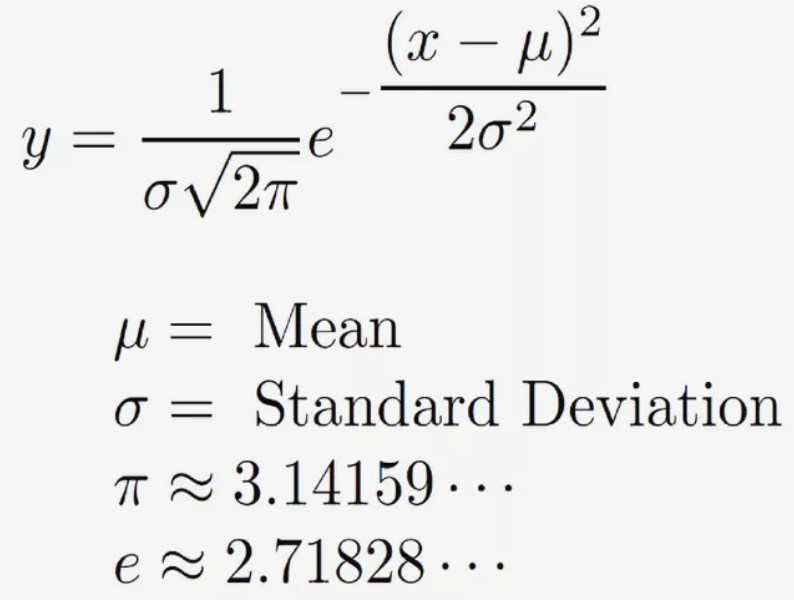
</div>

#  Linear Combinations, Weighted Sums and Dot Products

If your grocery store bill looks like:
<div>
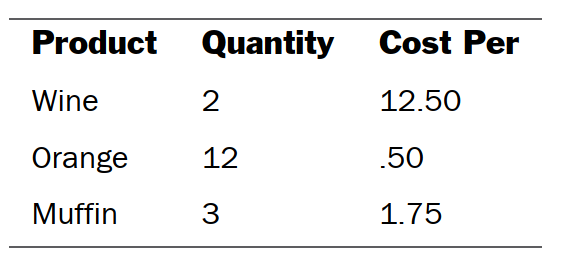
</div>
then you can figure out the total cost with some arithmetic:

In [7]:
(2 * 12.50) + (12 * .5) + (3 * 1.75) # We might think of this as a weighted sum

36.25

In [8]:
# pure python, old-school
quantity = [2, 12, 3]
costs = [12.5, .5, 1.75]
item_cost = []
for q,c in zip(quantity, costs):
    item_cost.append(q*c)
sum(item_cost)

36.25

In [10]:
# pure python, for the new-school, cool kids
quantity = [2, 12, 3]
costs = [12.5, .5, 1.75]
sum([q*c for q,c in zip(quantity,costs)])

36.25

In [11]:
quantity = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])
np.sum(quantity * costs) # element-wise multiplication

36.25

In [13]:
# np.dot multiplies the elements pairwise 
print("First way", quantity.dot(costs),"\nSeconde way", np.dot(quantity, costs),"\nThird way", quantity @ costs)

First way 36.25 
Seconde way 36.25 
Third way 36.25


##  Weighted Average

For example, if I have three values (10, 20, 30), I divide up my weights equally among the three values and, presto, I get
thirds: 1/3 * 10 + 1/3 * 20 + 1/3 * 30  ==> (10+20+30)/3

In [17]:
values = np.array([10.0, 20.0, 30.0])
weights = np.full_like(values, 1/3) # return array the same sahpe as values filled with 1/3

print("weights:", weights)
print("via mean:", np.mean(values))
print("via weights and dot:", np.dot(weights, values)) # We can write the mean as a weighted sum

weights: [0.3333 0.3333 0.3333]
via mean: 20.0
via weights and dot: 20.0


## Sums of squares

One other, very special, sum-of-products is when both the quantity and the value are two copies of the same thing. For example, 5 · 5 + (−3) · (−3) + 2 · 2 + 1 · 1 = 52 + 32 + 22 + 12 = 25 + 9 + 4 + 1 = 39. This is called a sum of squares since each element, multiplied by itself

In [18]:
values = np.array([5, -3, 2, 1])
squares = values * values # element-wise multiplication
print(squares, np.sum(squares), np.dot(values, values), sep="\n")

[25  9  4  1]
39
39


If I wrote this mathmatically it will look like np.dot(values, values), $\sum_{x = i}^{n} vi vi$ <br>
$\sum_{x = i}^{n} vi^{2}$.

## Sum of squared errors

If I have a known value actual and I have your guess as to its value predicted, I can compute your error with `error = predicted - actual.` Now this error can be positive or negative and to fix that we square the errors

In [20]:
errors = np.array([5, -5, 3.2, -1.1])
display(pd.DataFrame({'errors':errors,'squared':errors*errors}))
# Squared similat to np.dot(errors, errors)

,errors,squared
0,5.0000,25.0000
1,-5.0000,25.0000
2,3.2000,10.2400
3,-1.1000,1.2100


# A Geometric View: Points in Space

## Lines

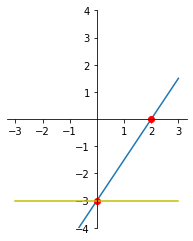

In [4]:
# paint by number
# create 100 x values from -3 to 3
xs = np.linspace(-3, 3, 100)

# slope (m) and intercept (b)
m, b = 1.5, -3

ax = plt.gca()

ys = m*xs + b
ax.plot(xs, ys)

ax.set_ylim(-4, 4)
high_school_style(ax) # helper from mlwpy.py

ax.plot(0, -3,'ro') # y-intercept
ax.plot(2, 0,'ro') # two steps right gives three steps up

# y = mx + b with m=0 gives y = b
ys = 0*xs + b
ax.plot(xs, ys, 'y');

If we are working with more than feature the equation will be y = $w_3$$x_3$ + $w_2$$x_2$ + $w_1$$x_1$ + $w_o$ 1

#  Notation and the Plus-One Trick

We can take the table and draw some brackets around it
<div>
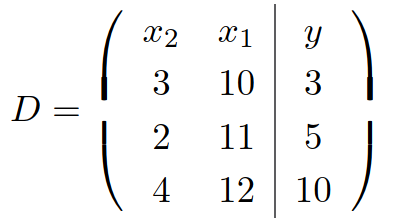
</div>
also written as D = (x, y) where x are the features and y is the target, we can add another column $x_0$ with the value of ones to be multiplied by $w_0$

## np.dot

We talked about the fact that np.dot multiples things element-wise and then adds them
up. Here’s just about the most basic example with a 1D array:

In [5]:
oned_vec = np.arange(5) 
print(oned_vec, "-->", oned_vec * oned_vec)
print("self dot:", np.dot(oned_vec, oned_vec)) # sum of squared

[0 1 2 3 4] --> [ 0  1  4  9 16]
self dot: 30


In [10]:
# using a row and a column
row_vec = np.arange(5).reshape(1, 5)  # 1 row , 5 col
col_vec = np.arange(0, 50, 10).reshape(5, 1)  # 5 row , 1 col 

In [12]:
# row_vec . col_vec ==> (1,5) . (5,1) >>(1,1)
print("row vec:", row_vec,
"col_vec:", col_vec,
"dot:", np.dot(row_vec, col_vec), sep='\n')

row vec:
[[0 1 2 3 4]]
col_vec:
[[ 0]
 [10]
 [20]
 [30]
 [40]]
dot:
[[300]]


In [13]:
# if we swapped the order we get a mtrix (5,5)
np.dot(col_vec, row_vec)

array([[  0,   0,   0,   0,   0],
       [  0,  10,  20,  30,  40],
       [  0,  20,  40,  60,  80],
       [  0,  30,  60,  90, 120],
       [  0,  40,  80, 120, 160]])

In [14]:
col_vec = np.arange(0, 50, 10).reshape(5, 1)
row_vec = np.arange(0, 5).reshape(1, 5)

oned_vec = np.arange(5)

np.dot(oned_vec, col_vec)

array([300])

In [15]:
np.dot(col_vec, oned_vec)

ValueError: shapes (5,1) and (5,) not aligned: 1 (dim 1) != 5 (dim 0)

In [19]:
print(oned_vec.shape, oned_vec.T.shape, sep = '\n')

(5,)
(5,)


<div>
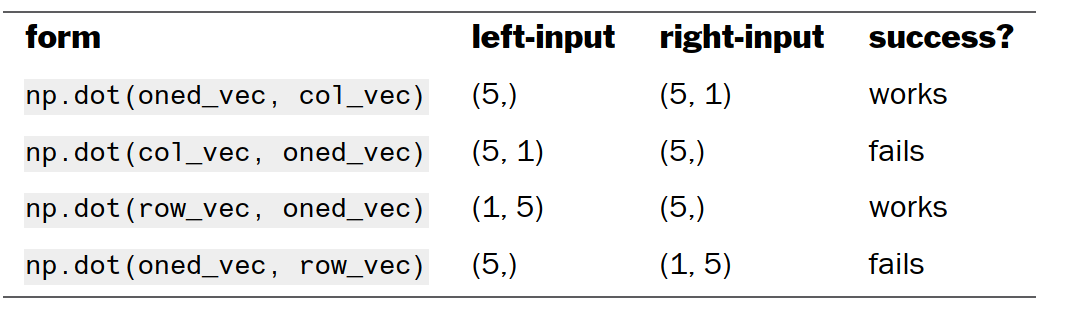
</div>

For the working cases, we can see what happens if we force-reshape the 1D array:

In [20]:
# allclose check if all the values are close
print(np.allclose(np.dot(oned_vec.reshape(1, 5), col_vec),np.dot(oned_vec, col_vec)),
np.allclose(np.dot(row_vec, oned_vec.reshape(5, 1)),np.dot(row_vec, oned_vec)))

True True


Effectively, for the cases that work, the 1D array is bumped up to (1, 5) if it is on the
left and to (5, 1) if it is on the right. Basically, the 1D receives a placeholder dimension
on the side it shows up in the np.dot.

In [25]:
# D is in the shape (4,2), w in shape (2,)
D = np.array([[1, 3],
[2, 5],
[2, 7],
[3, 2]])
w = np.array([1.5, 2.5])

In [26]:
np.dot(D,w) # w is reshaped to (2,1)

array([ 9. , 15.5, 20.5,  9.5])

In [29]:
try:
    np.dot(w,D) # to work w must be in the shape(2,4) and the w can only reshaped to (2,1)
except ValueError:
    print("BOOM. :(")

BOOM. :(


#  Floating-Point Issues

In [30]:
1.1 + 2.2 == 3.3

False

In [31]:
np.allclose(1.1 + 2.2, 3.3)

True